In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
#plt.rcParams['figure.figsize'] = [5, 5]



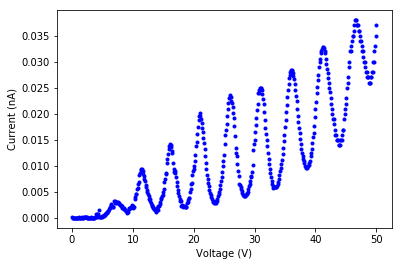

In [37]:
data_man = np.loadtxt("Fh_man.csv",delimiter=",", skiprows = 1)

voltsm = data_man[:,0]
ampsm = data_man[:,1]

plt.plot(voltsm,ampsm,'.',color = 'b')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (nA)")
plt.show()

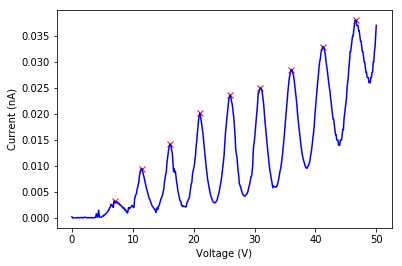

In [38]:
peaks, _ = find_peaks(ampsm,prominence = 0.002)
plt.plot(voltsm[peaks], ampsm[peaks], 'x', color = "r")
plt.plot(voltsm,ampsm,color = 'b')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (nA)")
plt.show()

In [39]:
print(voltsm[peaks])

x= 0

print("Voltage difference between peaks")
for i in range(len(voltsm[peaks])-1):
    x = -voltsm[peaks][i+1] + voltsm[peaks][i]
    print(x)

[46.6 41.2 36.  30.9 26.  21.  16.1 11.5  7. ]
Voltage difference between peaks
5.399999999999999
5.200000000000003
5.100000000000001
4.899999999999999
5.0
4.899999999999999
4.600000000000001
4.5


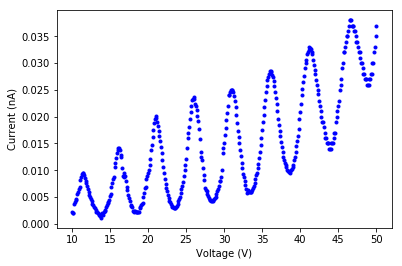

In [45]:
data_man = np.loadtxt("FH_man2.csv",delimiter=",", skiprows = 1)

voltsm = data_man[:,0]
ampsm = data_man[:,1]

plt.plot(voltsm,ampsm,'.',color = 'b')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (nA)")
plt.show()

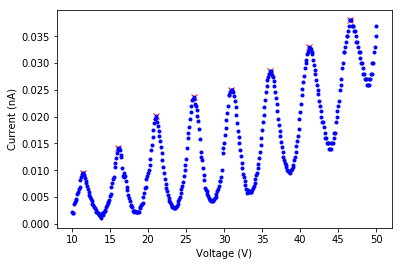

In [46]:
peaks3, _ = find_peaks(ampsm,prominence = 0.002)
plt.plot(voltsm[peaks3], ampsm[peaks3], 'x', color = "r")
plt.plot(voltsm,ampsm,'.',color = 'b')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (nA)")
plt.show()

# This one is the right one

first graph is manual data, a log function is fitted to explain the rising current seen
the second is calibrated, then got the peak finding thing, the difference is printed out


In [47]:
from scipy.optimize import curve_fit

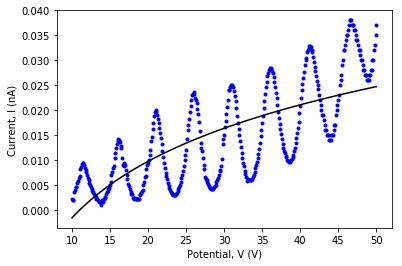

[ 0.01634124 -0.0392181 ]
[[ 6.36895047e-07 -2.11058382e-06]
 [-2.11058382e-06  7.11633574e-06]]


In [53]:
def logfunc(x,a,d):
    y = a*np.log(x)+d
    return y

c1,cov1 = curve_fit(logfunc,voltsm,ampsm)

Iopt = logfunc(voltsm,c1[0],c1[1])

plt.plot(voltsm,ampsm,'.', color = 'b')
plt.plot(voltsm,Iopt, color = 'k')
plt.ylabel('Current, I (nA)')
plt.xlabel('Potential, V (V)')
plt.show()

print(c1)
print(cov1)

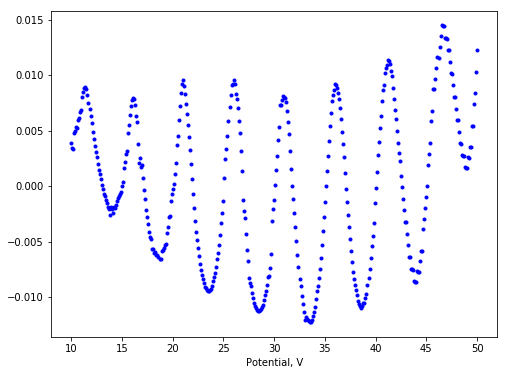

In [102]:
i_old = ampsm
y = np.empty(len(i_old))
x = voltsm
i_new = np.empty(len(x))

a = c1[0]
b = c1[1]

for i in range(len(i_old)):
    y[i] = np.log(x[i])*a +b
    i_new[i] = i_old[i] - y[i]
    
plt.plot(voltsm,i_new, '.', color = 'b')
plt.xlabel('Potential, V')
plt.show()

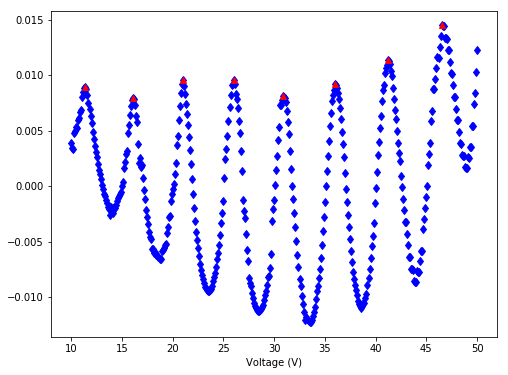

[46.5 41.2 36.  30.9 26.  21.  16.1 11.4]
Voltage difference between peaks
5.299999999999997
5.200000000000003
5.100000000000001
4.899999999999999
5.0
4.899999999999999
4.700000000000001


In [111]:
peaks1, _ = find_peaks(i_new,prominence = 0.002)


plt.plot(voltsm,i_new,'d',color = 'b')
plt.plot(voltsm[peaks1], i_new[peaks1], '^', color = "red")
plt.xlabel('Voltage (V)')
plt.show()

print(voltsm[peaks1])

x= 0

print("Voltage difference between peaks")
for i in range(len(voltsm[peaks1])-1):
    x = -voltsm[peaks1][i+1] + voltsm[peaks1][i]
    print(x)

## ignore here until the next bold thing


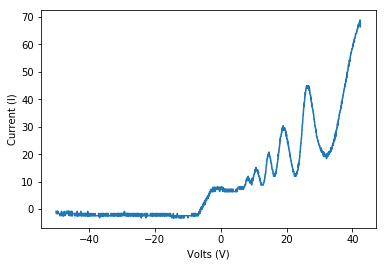

In [14]:
data_au = np.loadtxt("FH_os.csv",delimiter=",")

voltsa = data_au[:,0]*10000
ampsa = data_au[:,1]

plt.plot(voltsa,ampsa)
plt.xlabel("Volts (V)")
plt.ylabel("Current (I)")
plt.show()

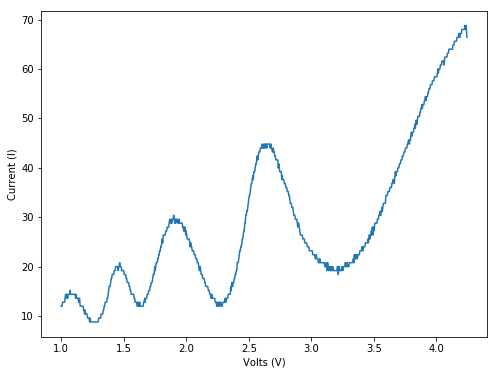

In [84]:
data_au = np.loadtxt("FH_os2.csv",delimiter=",")

voltsa = data_au[:,0]*1000
ampsa = data_au[:,1]

plt.plot(voltsa,ampsa)
plt.xlabel("Volts (V)")
plt.ylabel("Current (I)")
plt.show()

# from this onwards is the same thing as above, just that it is for the oscilloscope

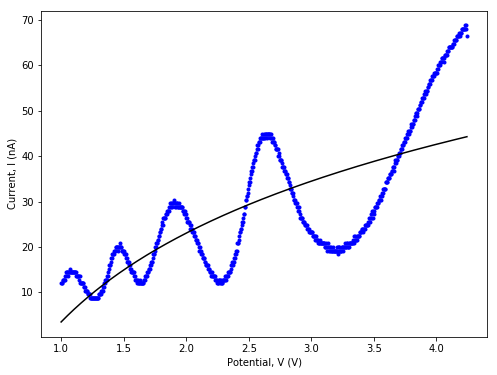

[28.23044327  3.49207835]
[[ 0.89854557 -0.80050739]
 [-0.80050739  0.85497694]]


In [85]:
c2,cov2 = curve_fit(logfunc,voltsa,ampsa)

Iopt2 = logfunc(voltsa,c2[0],c2[1])

plt.plot(voltsa,ampsa,'.', color = 'b')
plt.plot(voltsa,Iopt2, color = 'k')
plt.ylabel('Current, I (nA)')
plt.xlabel('Potential, V (V)')
plt.show()

print(c2)
print(cov2)

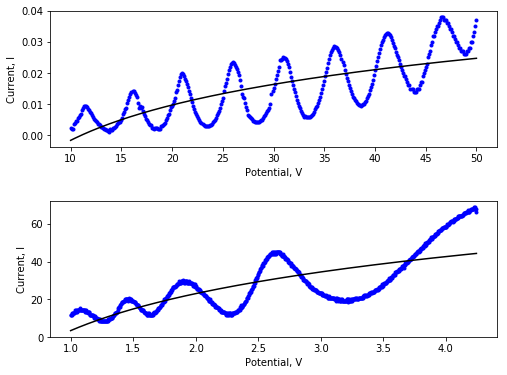

In [87]:
plt.rcParams['figure.figsize'] = [8, 6]


fig, ax = plt.subplots(2)

ax[0].plot(voltsm,ampsm,'.',color = 'b') #row=0, col=0
ax[0].plot(voltsm,Iopt,color = 'k')

ax[1].plot(voltsa,ampsa,'.',color = 'b')
ax[1].plot(voltsa,Iopt2,color = 'k')#row=1, col=0

for ax in ax.flat:
    ax.set(xlabel='Potential, V', ylabel='Current, I')
    
plt.subplots_adjust(wspace = 0.2,hspace = 0.4)

plt.show()

# and thats it

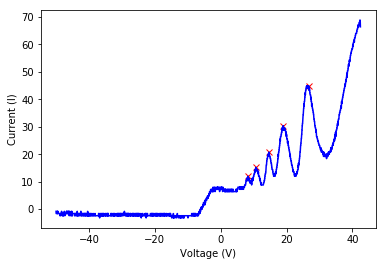

In [33]:
peaks1, _ = find_peaks(ampsa,prominence = 3,distance = 20)
plt.plot(voltsa[peaks1], ampsa[peaks1], 'x', color = "r")
plt.plot0 (voltsa,ampsa,color = 'b')
plt.xlabel('Voltage (V)')
plt.ylabel("Current (I)")
plt.show()

In [34]:
print(voltsa[peaks1])

x= 0

print("Voltage difference between peaks")
for i in range(len(voltsa[peaks1])-1):
    x = voltsa[peaks1][i+1] - voltsa[peaks1][i]
    print(x)

[ 8.36 10.72 14.68 19.   26.76]
Voltage difference between peaks
2.3599999999999994
3.959999999999999
4.32
7.760000000000002
